In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Layer
from sklearn.model_selection import train_test_split
import numpy
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,)# random_state=seed)

In [12]:
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss= 'binary_crossentropy', optimizer= tf.keras.optimizers.SGD(0.0001) , metrics=[ 'accuracy' ])

In [14]:
history=model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=10)

Epoch 1/10
62/62 [==============================] - 1s 6ms/step - loss: 0.6917 - accuracy: 0.6287 - val_loss: 0.6910 - val_accuracy: 0.6364
Epoch 2/10
62/62 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.6173 - val_loss: 0.6908 - val_accuracy: 0.6429
Epoch 3/10
62/62 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.6319 - val_loss: 0.6905 - val_accuracy: 0.6558
Epoch 4/10
62/62 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.6368 - val_loss: 0.6903 - val_accuracy: 0.6558
Epoch 5/10
62/62 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.6352 - val_loss: 0.6900 - val_accuracy: 0.6623
Epoch 6/10
62/62 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.6384 - val_loss: 0.6898 - val_accuracy: 0.6688
Epoch 7/10
62/62 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.6401 - val_loss: 0.6895 - val_accuracy: 0.6753
Epoch 8/10
62/62 [==

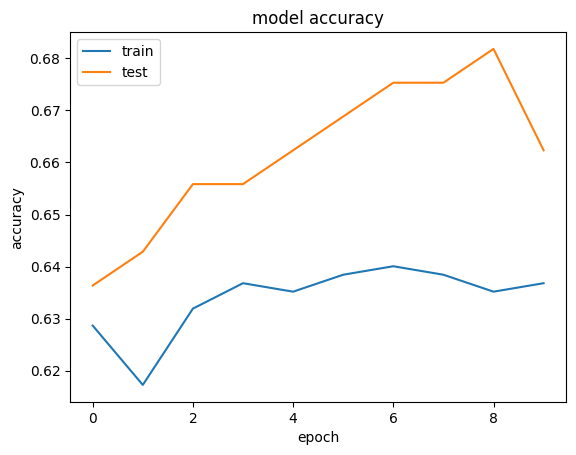

In [16]:
plt.plot(history.history[ "accuracy" ])
plt.plot(history.history[ "val_accuracy" ])
plt.title( "model accuracy" )
plt.ylabel( "accuracy" )
plt.xlabel( "epoch" )
plt.legend([ "train" , "test" ], loc= "upper left" )
plt.show()

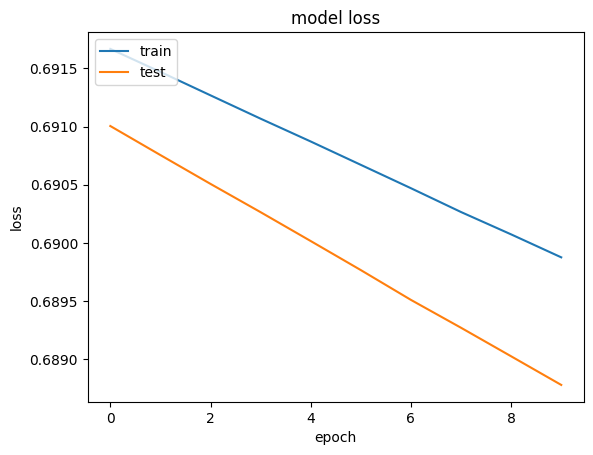

In [17]:
# summarize history for loss
plt.plot(history.history[ "loss" ])
plt.plot(history.history[ "val_loss" ])
plt.title( "model loss" )
plt.ylabel( "loss" )
plt.xlabel( "epoch" )
plt.legend([ "train" , "test" ], loc= "upper left" )
plt.show()